e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


F1-score (avg): 0.7058823529411764  std: 0.1275941880204933
Accuracy (avg): 0.8977272727272727  std: 0.03409090909090906

F1-scores per fold: [0.5        0.8        0.82352941 0.7       ]
Accuracies per fold: [0.86363636 0.93181818 0.93181818 0.86363636]


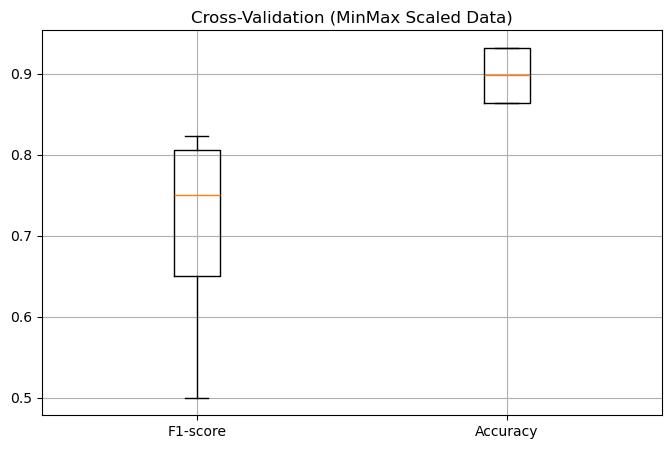

In [16]:
# 03_train_scaled.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

# ----------------------------
# 1. 读取排序后的训练数据
# ----------------------------
df_sorted = pd.read_csv("../data/train_robot_sorted_v1.csv")

X = df_sorted.drop(columns=["Target"])
y = df_sorted["Target"]

# ----------------------------
# 2. 对 X 特征进行归一化处理
# ----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 3. 定义 MLP 模型
#    可尝试对比不同激活函数效果
# ----------------------------
# 2. 定义 MLP 神经网络模型
model = MLPClassifier(
    hidden_layer_sizes=(50,25,12,6),   # 隐藏层结构，改成 (100,), (50, 50), (100, 50, 25) 等试不同结构
    activation='relu',          # 激活函数,activation 换成 'tanh',relu,'logistic' 看是否更适合
    solver='adam',              # 优化器adam,lbfgs,sgd
    max_iter=500,               # 最大迭代次数
    random_state=42,             # 固定随机种子
    
    
)

# ----------------------------
# 4. 使用交叉验证评估
# ----------------------------
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}
scores = cross_validate(model, X_scaled, y, cv=4, scoring=scoring)

# ----------------------------
# 5. 打印得分结果
# ----------------------------
print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())

print("\nF1-scores per fold:", scores['test_f1'])
print("Accuracies per fold:", scores['test_accuracy'])

# ----------------------------
# 6. 可视化评分分布
# ----------------------------
plt.figure(figsize=(8, 5))
plt.boxplot(
    [scores['test_f1'], scores['test_accuracy']],
    tick_labels=['F1-score', 'Accuracy']
)
plt.title("Cross-Validation (MinMax Scaled Data)")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler  # 如果你用的是归一化数据
import matplotlib.pyplot as plt

# ----------------------------
# 1. 加载数据（可替换成你当前使用的数据文件）
# ----------------------------
df = pd.read_csv("../data/train_robot_sorted_v1.csv")  # 或 train_robot_v1.csv
X = df.drop(columns=["Target"])
y = df["Target"]

# ✅ 如需归一化数据，取消注释下列两行：
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)


config_list = [
    {"layers": (50, 50,25,12),       "activation": "relu",    "solver": "adam"},
    {"layers": (50, 50,25),          "activation": "tanh",    "solver": "adam"},
    {"layers": (100, 50),            "activation": "tanh","solver": "adam"},
    {"layers": (128, 64, 32),        "activation": "relu",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "tanh",    "solver": "lbfgs"},
    {"layers": (50, 25, 12),         "activation": "relu",    "solver": "adam"},
]


results = []

for config in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=config["layers"],
        activation=config["activation"],
        solver=config["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(
        model, X, y,
        cv=4,
        scoring={"f1": "f1", "accuracy": "accuracy"}
    )
    
    results.append({
        "layers": config["layers"],
        "activation": config["activation"],
        "solver": config["solver"],
        "F1-avg": round(scores["test_f1"].mean(), 4),
        "F1-std": round(scores["test_f1"].std(), 4),
        "Acc-avg": round(scores["test_accuracy"].mean(), 4),
        "Acc-std": round(scores["test_accuracy"].std(), 4)
    })

# ----------------------------
# 4. 输出结果表格
# ----------------------------
result_df = pd.DataFrame(results)
display(result_df)

# ----------------------------
# 5. 可视化 F1-score 对比（可选）
# ----------------------------
plt.figure(figsize=(10, 5))
plt.bar(range(len(result_df)), result_df["F1-avg"], tick_label=[
    f"{r['layers']}\n{r['activation']}/{r['solver']}" for r in results
])
plt.ylabel("F1-score (avg)")
plt.xticks(rotation=45)
plt.title("F1-score Comparison Across Configurations")
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../data/train_robot_sorted_v1.csv'